<a href="https://colab.research.google.com/github/RadwaTareq/Numerical_Optmization/blob/main/Momentum_NAG_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that:
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [ ]:
x= np.linspace(0,20)
x

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [ ]:
a=-1
b=2
y=a*x+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

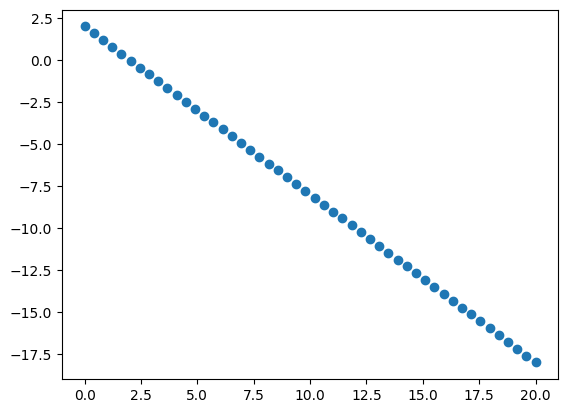

In [ ]:
plt.scatter(x,y)

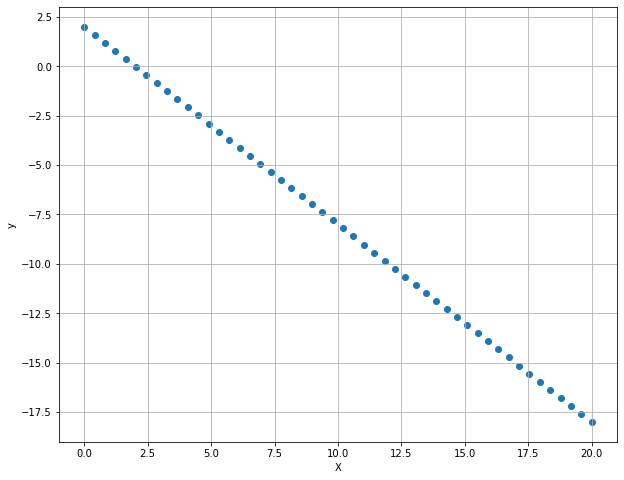

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [ ]:
def gd(x,y,alpha,iterations):
    theta0=0
    theta1=0
    loss=[]
    theta0l=[]
    theta1l=[]
    y_predictl=[]
    for i in range(0,iterations):
        y_predict=theta0+theta1*x
        errorvec=y_predict-y
        j = (1/(2*len(y)))*np.sum(errorvec**2)
        jtheta0=(1/len(x))*sum(errorvec)
        jtheta1=(1/len(x))*sum(errorvec*x)
        gradientvec=np.array([[jtheta0],[jtheta1]])
        gradientvecnorm=np.linalg.norm(gradientvec)
        theta0l.append(theta0)
        theta1l.append(theta1)
        y_predictl.append(y_predict)
        loss.append(j)
        print(f"****************** Iteration {i} ********************")
        print("\nh(x):",y_predict)
        print("\nError Vector:\n",errorvec)
        print("\nj =", j)
        print("\nGradient Vector: \n",gradientvec)
        print("gradientvecnorm",gradientvecnorm)
        print("\ntheta_0_new",theta0)
        print("\ntheta_1_new",theta1)
        if gradientvecnorm <1.3 or( i>=1 and np.absolute(loss[-2]-loss[-1])<0.001):
            print("****************** Training Report ********************")
            print(f"\nGradient Descent converged after {len(theta0l)} epochs")
            print("\ntheta_0_Opt :",theta0)
            print("\ntheta_1_Opt :",theta1)
            print("\nError Vector:\n",errorvec)
            print("\ncost:",j)
            print("\nh(x) = y_predict:\n",y_predict)
            print("\ny_actual:",y)
            break
        theta0=theta0-(alpha*jtheta0)
        theta1=theta1-(alpha*jtheta1)
    return theta0l,theta1l,loss,y_predictl,theta0,theta1
theta0l,theta1l,loss,y_predictl,theta0,theta1=gd(x,y,0.0005,300)


****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector: 
 [[  8.        ]
 [114.69387755]]
gradientvecnorm 114.97254258164628

theta_0_new 0

theta_1_new 0
****************** It

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [ ]:
print("r2_score:",r2_score(y,y_predictl[len(y_predictl)-1]))

r2_score: 0.9686158031920962


r2_score: 0.9686158031920962


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

In [ ]:
def plott(x, y,value):
    plt.plot(x, y,marker="o",color='purple')
    match value:
        case 0:
            plt.xlabel("Epochs")
            plt.ylabel("Loss")
        case 1:
            plt.xlabel("Theta 0")
            plt.ylabel("Loss")
        case 2:
            plt.xlabel("Theta 1")
            plt.ylabel("Loss")



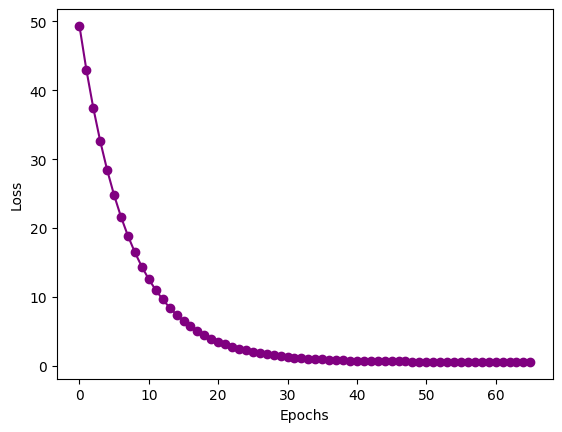

In [ ]:
Epochs=np.arange(0,len(loss))
plott(Epochs,loss,0)

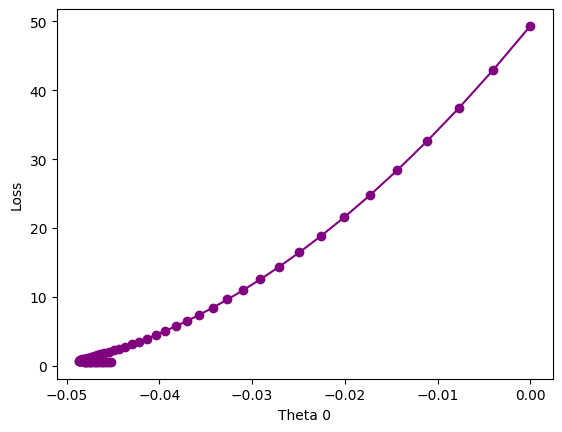

In [ ]:
plott(theta0l,loss,1)


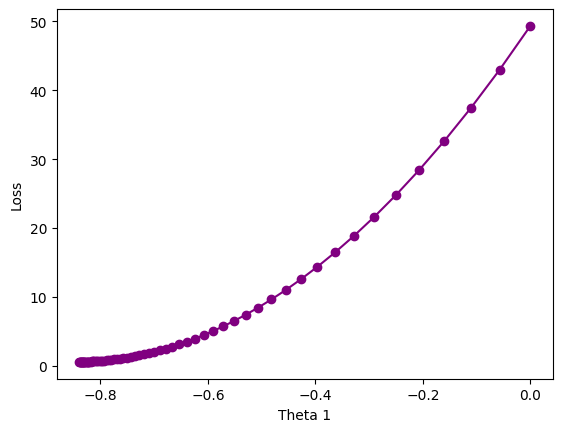

In [ ]:
plott(theta1l,loss,2)

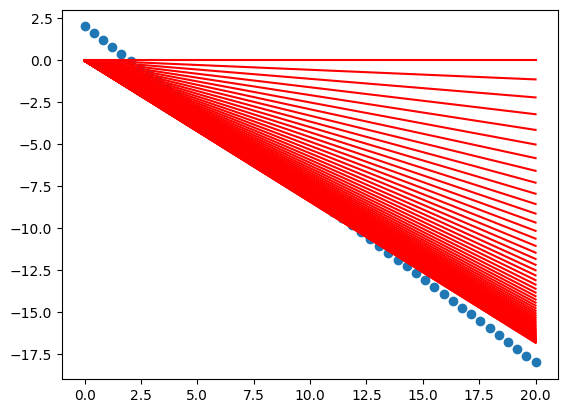

In [ ]:
plt.scatter(x,y)
for i in range(0,len(y_predictl)):
    plt.plot(x,y_predictl[i],color="r")

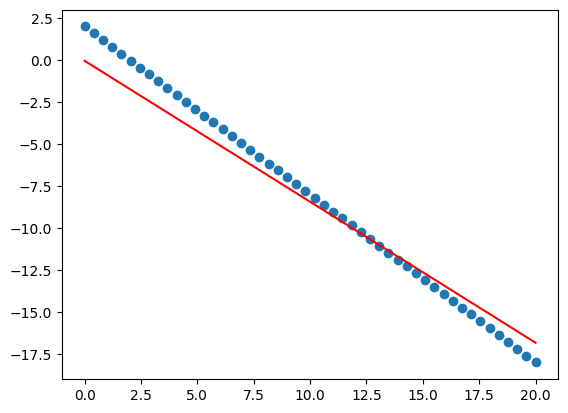

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_predictl[-1],color="r")

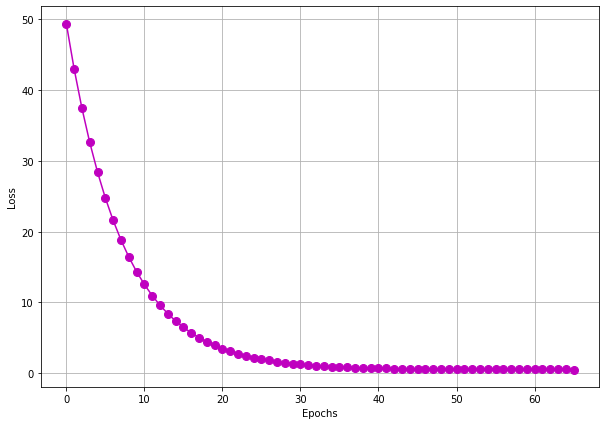

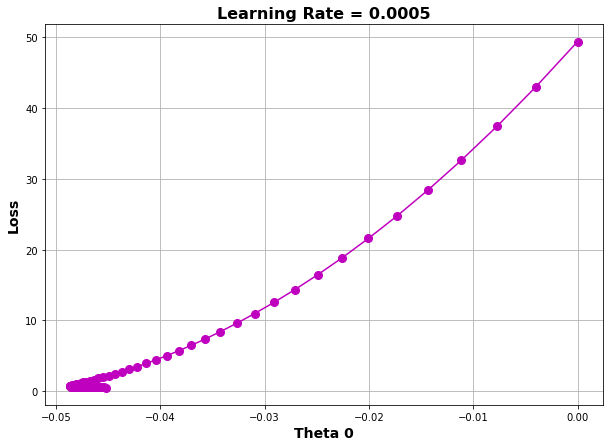

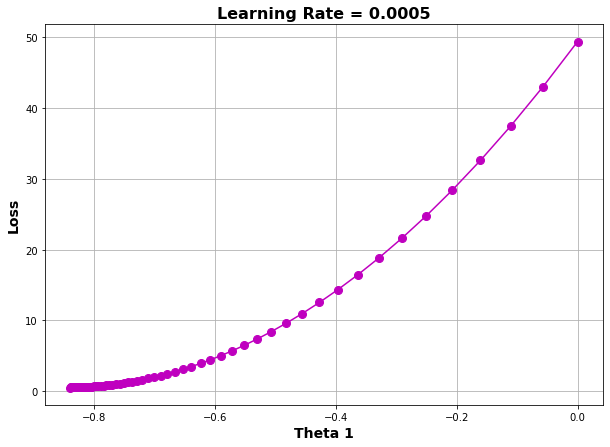

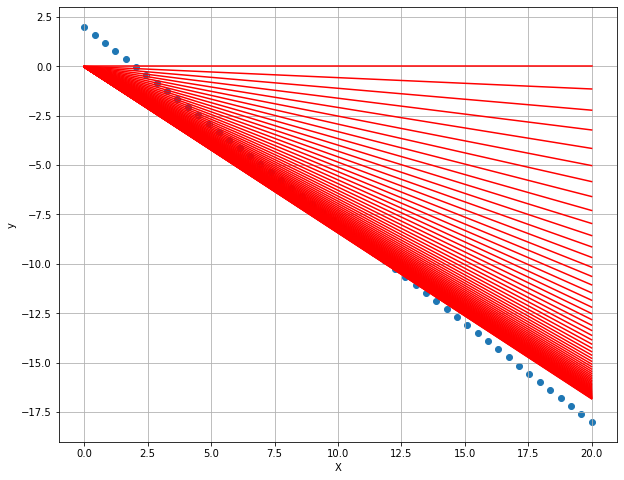

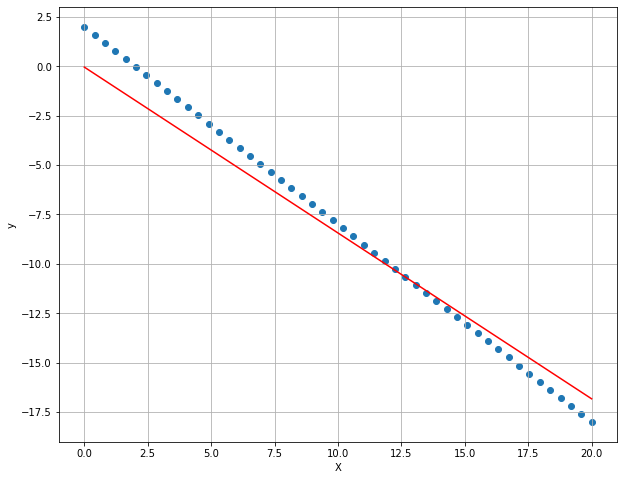

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [ ]:

def mom(x,y,alpha,gama,iterations):
    theta0=0
    theta1=0
    vt0=0
    vt1=0
    loss=[]
    theta0l=[]
    theta1l=[]
    y_predictl=[]
    v0=[]
    v1=[]
    for i in range(0,iterations):
        v0.append(vt0)
        v1.append(vt1)
        theta0l.append(theta0)
        theta1l.append(theta1)
        y_predict=theta0+theta1*x
        errorvec=y_predict-y
        j = (1/(2*len(y)))*np.sum(errorvec**2)
        jtheta0=(1/len(x))*sum(errorvec)
        jtheta1=(1/len(x))*sum(errorvec*x)
        gradientvec=np.array([[jtheta0],[jtheta1]])
        gradientvecnorm=np.linalg.norm(gradientvec)

        y_predictl.append(y_predict)
        loss.append(j)
        print(f"****************** Iteration {i} ********************")
        print("\nh(x):",y_predict)
        print("\nError Vector:\n",errorvec)
        print("\nj =", j)
        print("\nGradient Vector: \n",gradientvec)
        print("gradientvecnorm",gradientvecnorm)
        print("\ntheta_0_new",theta0)
        print("\ntheta_1_new",theta1)
        if gradientvecnorm <.01 or( i>=1 and np.absolute(loss[-2]-loss[-1])<0.001):
            print("****************** Training Report ********************")
            print(f"\nGradient Descent converged after {len(theta0l)} epochs")
            print("\ntheta_0_Opt :",theta0)
            print("\ntheta_1_Opt :",theta1)
            print("\nError Vector:\n",errorvec)
            print("\ncost:",j)
            print("\nh(x) = y_predict:\n",y_predict)
            print("\ny_actual:",y)
            break
        vt0=(gama*vt0)+(alpha*jtheta0)
        vt1=(gama*vt1)+(alpha*jtheta1)
        theta0=theta0-vt0
        theta1=theta1-vt1
    return theta0l,theta1l,loss,y_predictl,theta0,theta1
theta0l,theta1l,loss,y_predictl,theta0,theta1=mom(x,y,0.0005,0.5,300)


****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector: 
 [[  8.        ]
 [114.69387755]]
gradientvecnorm 114.97254258164628

theta_0_new 0

theta_1_new 0
****************** It

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [ ]:
print("r2_score:",r2_score(y,y_predictl[len(y_predictl)-1]))

r2_score: 0.9687892837396442


r2_score: 0.9687892837396442


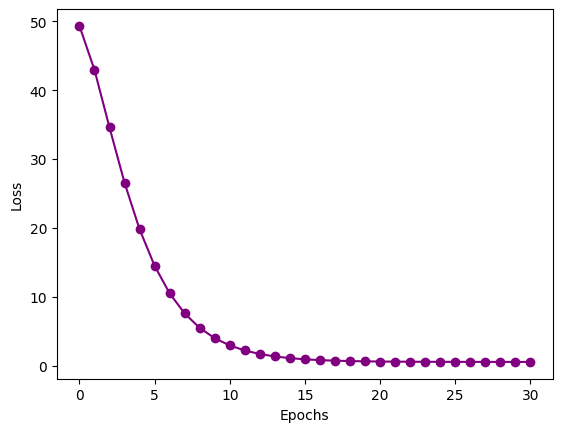

In [ ]:
Epochs=np.arange(0,len(loss))
plott(Epochs,loss,0)

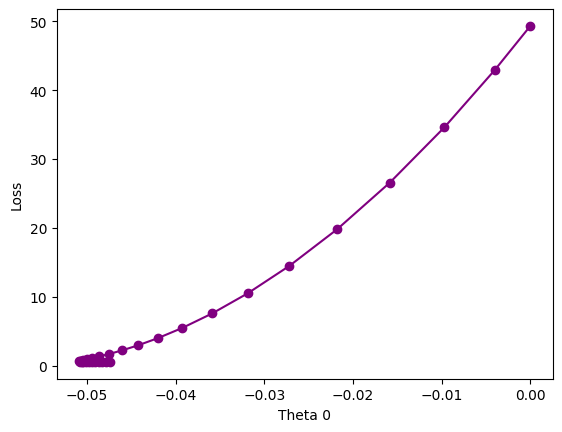

In [ ]:
plott(theta0l,loss,1)


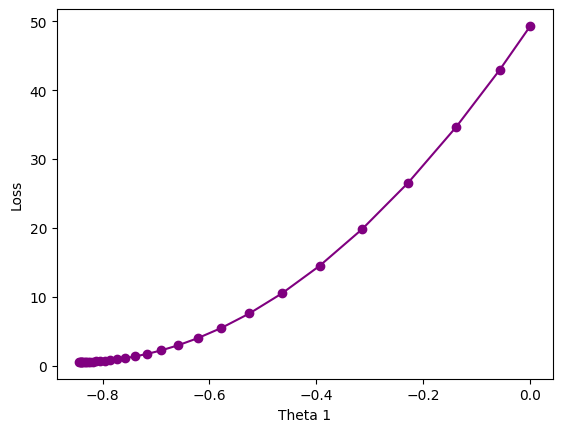

In [ ]:
plott(theta1l,loss,2)

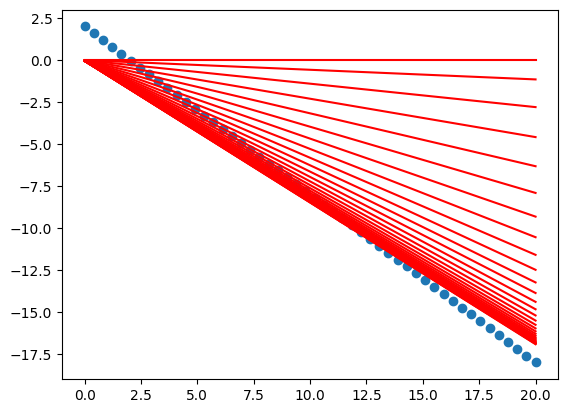

In [ ]:
plt.scatter(x,y)
for i in range(0,len(y_predictl)):
    plt.plot(x,y_predictl[i],color="r")

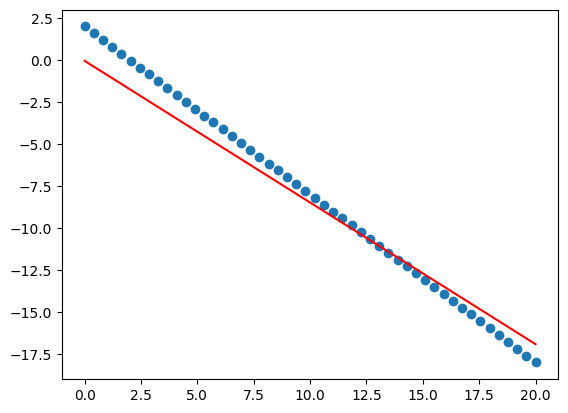

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_predictl[-1],color="r")

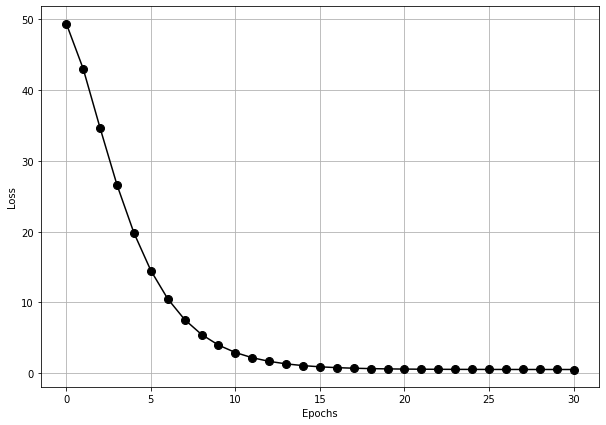

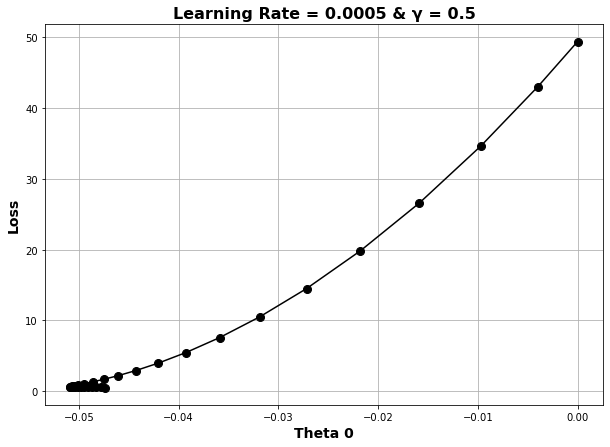

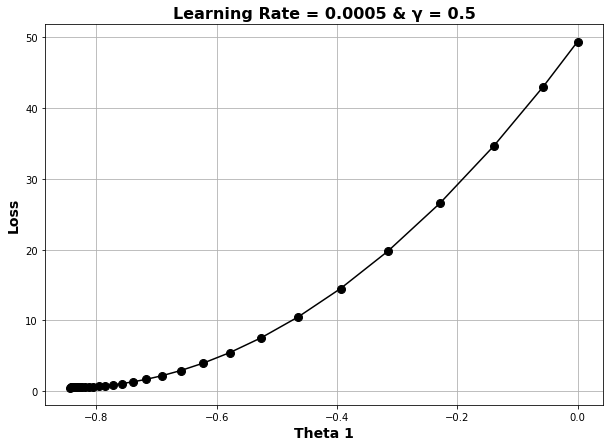

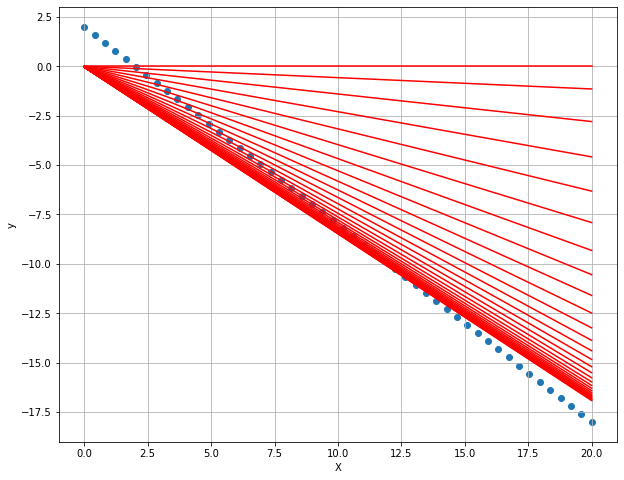

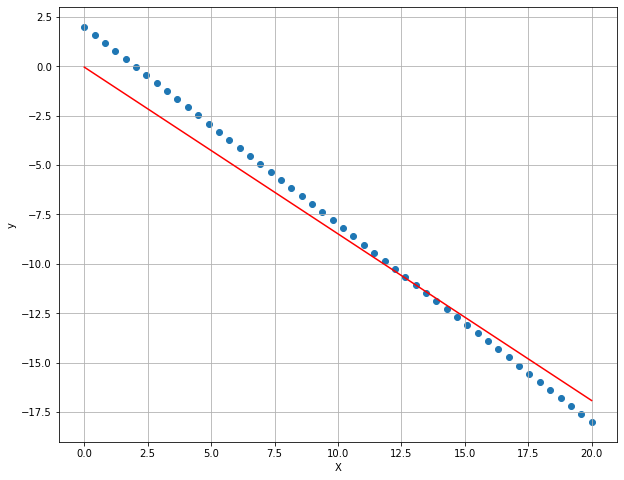

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero.
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [ ]:
theta0l,theta1l,loss,y_predictl,theta0,theta1=mom(x,y,0.0005,0.9,300)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector: 
 [[  8.        ]
 [114.69387755]]
gradientvecnorm 114.97254258164628

theta_0_new 0

theta_1_new 0
****************** It

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [ ]:
print("r2_score:",r2_score(y,y_predictl[len(y_predictl)-1]))

r2_score: 0.973589591111118


r2_score 0.973589591111118


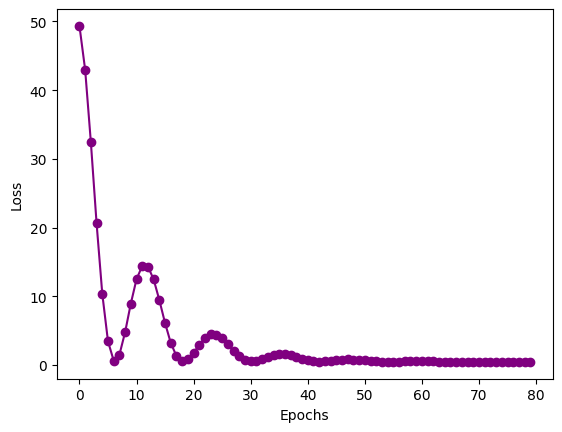

In [ ]:
Epochs=np.arange(0,len(loss))
plott(Epochs,loss,0)

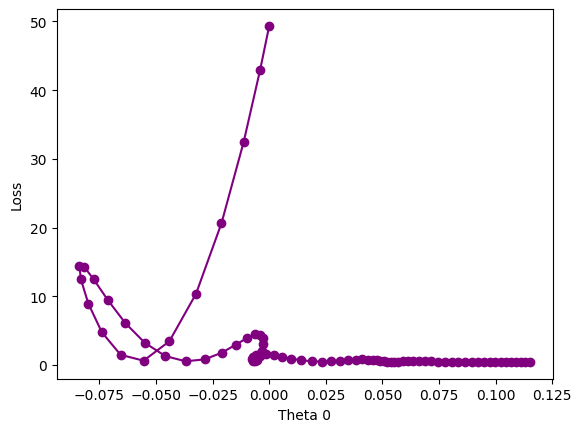

In [ ]:
plott(theta0l,loss,1)


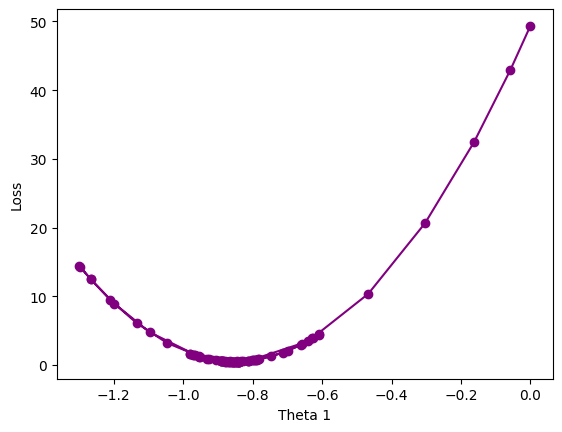

In [ ]:
plott(theta1l,loss,2)


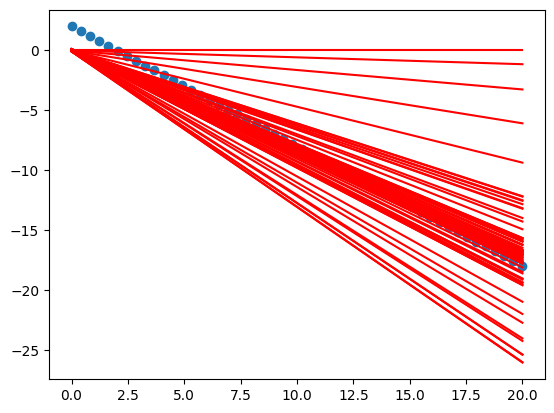

In [ ]:
plt.scatter(x,y)
for i in range(0,len(y_predictl)):
    plt.plot(x,y_predictl[i],color="r")

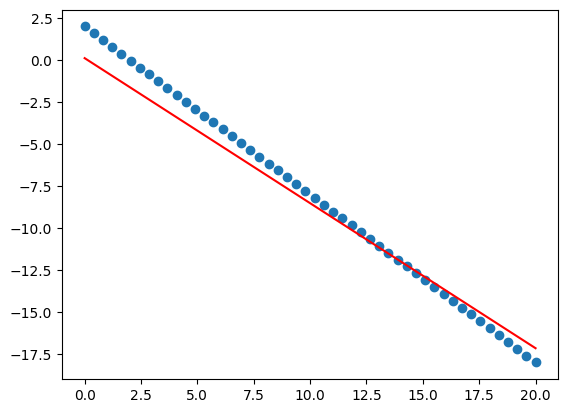

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_predictl[-1],color="r")

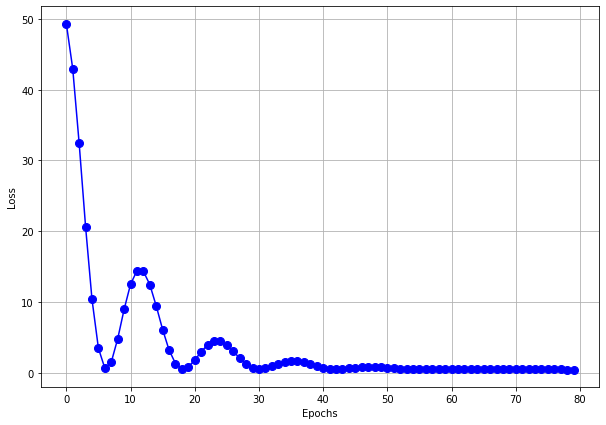

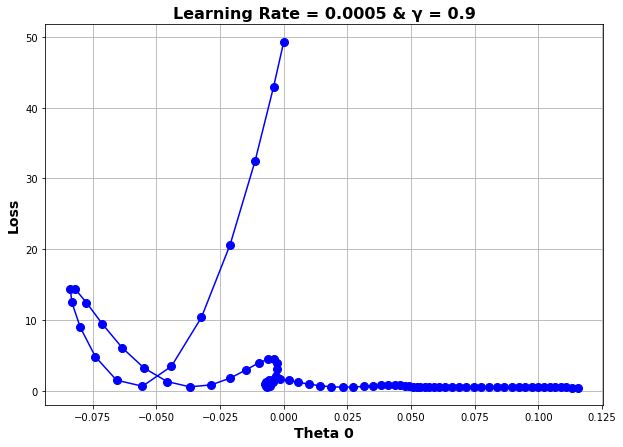

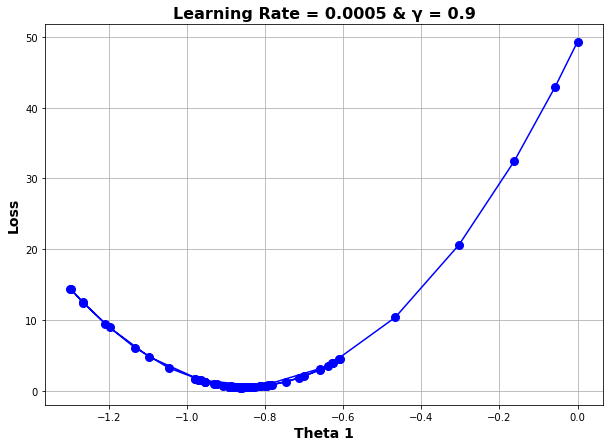

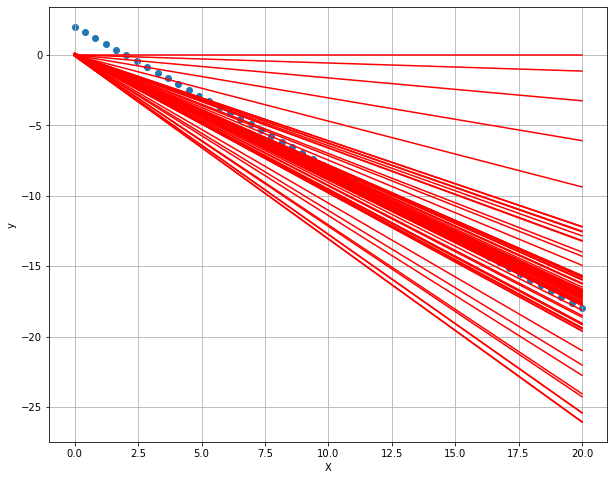

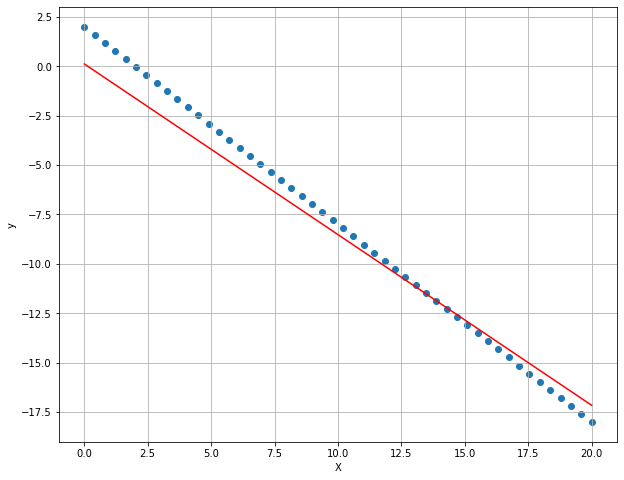

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [ ]:
theta0l,theta1l,loss,y_predictl,theta0,theta1=mom(x,y,0.0005,0.89,300)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector: 
 [[  8.        ]
 [114.69387755]]
gradientvecnorm 114.97254258164628

theta_0_new 0

theta_1_new 0
****************** It

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [ ]:
print("r2_score:",r2_score(y,y_predictl[len(y_predictl)-1]))

r2_score: 0.972435565060376


r2_score: 0.972435565060376


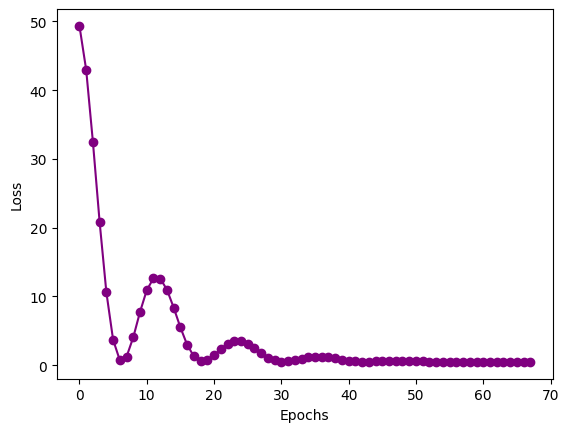

In [ ]:
Epochs=np.arange(0,len(loss))
plott(Epochs,loss,0)

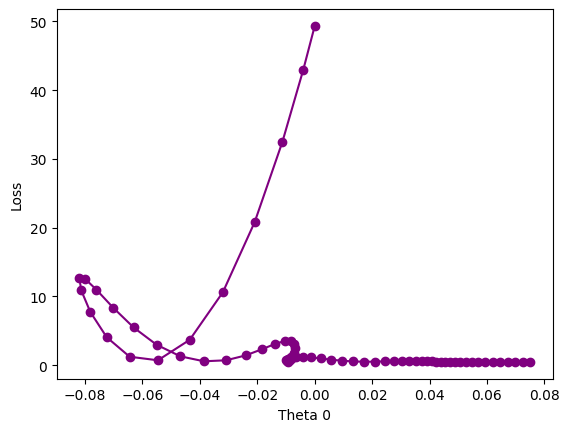

In [ ]:
plott(theta0l,loss,1)


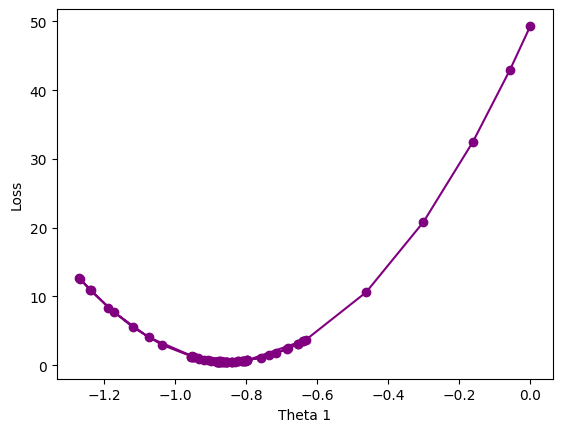

In [ ]:
plott(theta1l,loss,2)

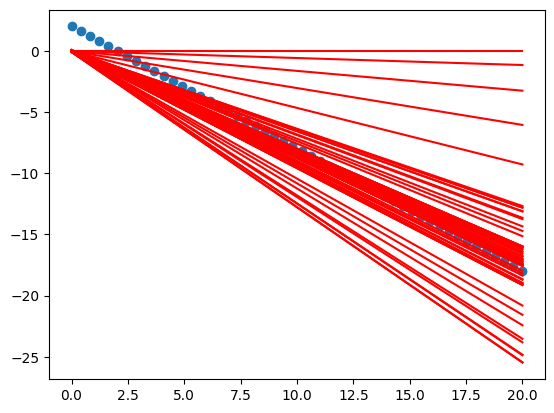

In [ ]:
plt.scatter(x,y)
for i in range(0,len(y_predictl)):
    plt.plot(x,y_predictl[i],color="r")

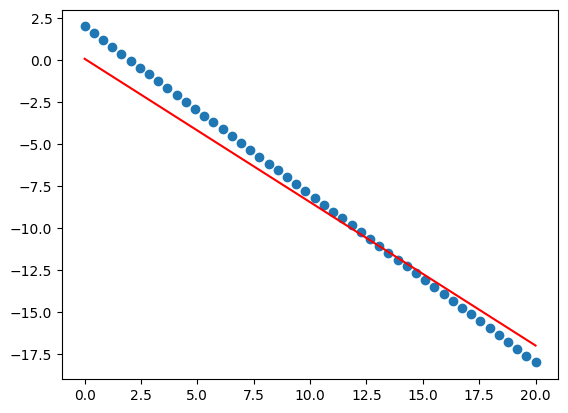

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_predictl[-1],color="r")

r2 score =  0.972435565060376


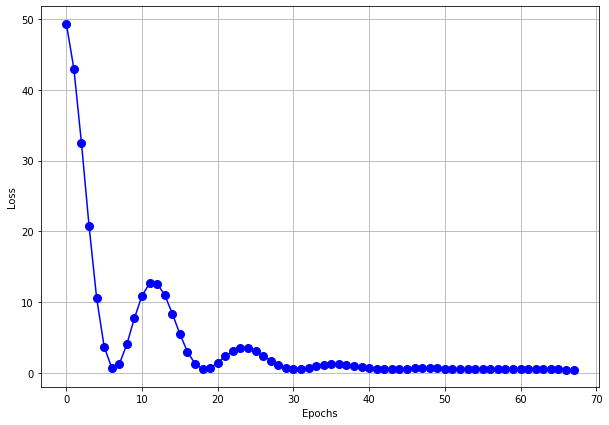

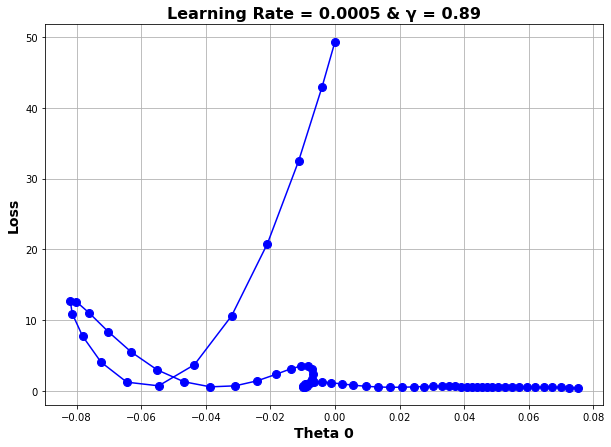

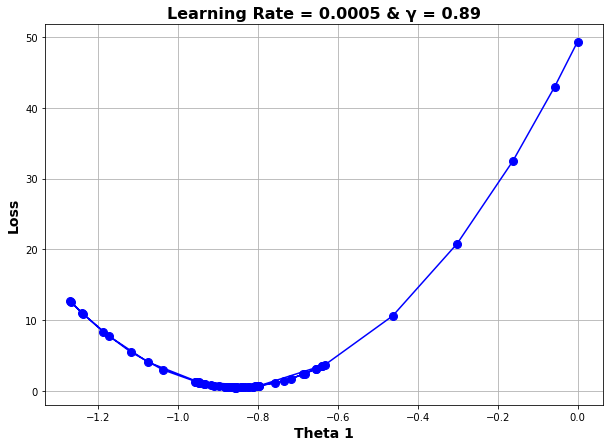

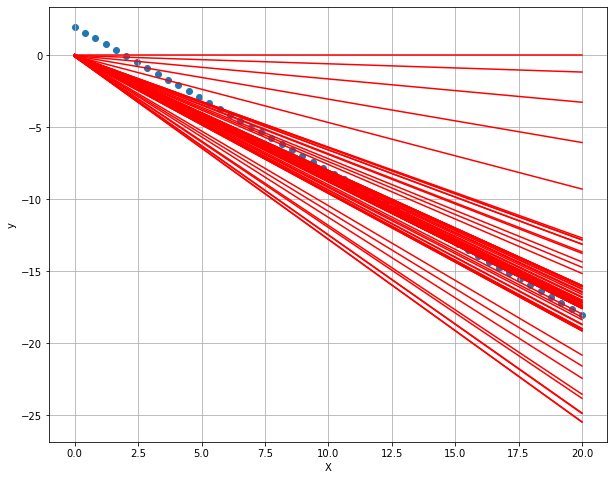

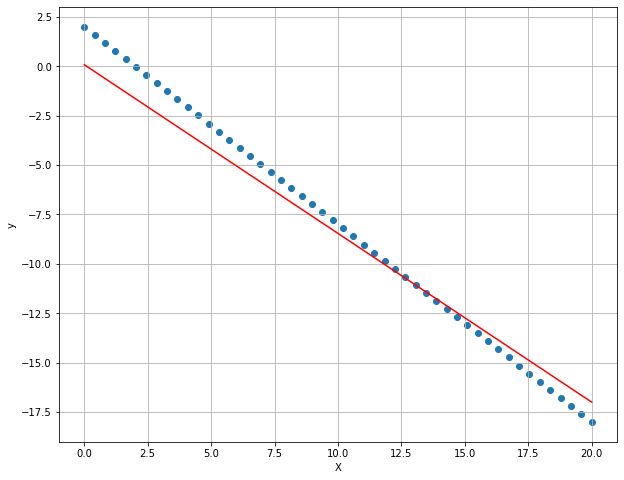

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero.
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b>
##### h_temp = theta0_temp + theta1_temp * X

In [ ]:

def nag(x,y,alpha,gama,iterations):
    theta0=0
    theta1=0
    vt0=0
    vt1=0
    loss=[]
    theta0l=[]
    theta1l=[]
    y_predictl=[]
    v0=[]
    v1=[]
    for i in range(0,iterations):
        v0.append(vt0)
        v1.append(vt1)
        theta0l.append(theta0)
        theta1l.append(theta1)
        y_predict=theta0+theta1*x
        errorvec=y_predict-y
        j = (1/(2*len(y)))*np.sum(errorvec**2)
        jtheta0=(1/len(x))*sum(errorvec)
        jtheta1=(1/len(x))*sum(errorvec*x)
        gradientvec=np.array([[jtheta0],[jtheta1]])
        gradientvecnorm=np.linalg.norm(gradientvec)
        y_predictl.append(y_predict)
        loss.append(j)
        print(f"****************** Iteration {i} ********************")
        print("\nh(x):",y_predict)
        print("\nError Vector:\n",errorvec)
        print("\nj =", j)
        print("\nGradient Vector: \n",gradientvec)
        print("gradientvecnorm",gradientvecnorm)
        print("\ntheta_0_new",theta0)
        print("\ntheta_1_new",theta1)
        if gradientvecnorm <.001 or( i>=1 and np.absolute(loss[-2]-loss[-1])<0.001):
            print("****************** Training Report ********************")
            print(f"\nGradient Descent converged after {len(theta0l)} epochs")
            print("\ntheta_0_Opt :",theta0)
            print("\ntheta_1_Opt :",theta1)
            print("\nError Vector:\n",errorvec)
            print("\ncost:",j)
            print("\nh(x) = y_predict:\n",y_predict)
            print("\ny_actual:",y)
            break
        thetatmp0=theta0-gama*vt0
        thetatmp1=theta1-gama*vt1
        y_predicttmp=thetatmp0+thetatmp1*x
        errorvectmp=y_predicttmp-y
        jthetatmp0=(1/len(x))*sum(errorvectmp)
        jthetatmp1=(1/len(x))*sum(errorvectmp*x)
        theta0=thetatmp0-alpha*jthetatmp0
        theta1=thetatmp1-alpha*jthetatmp1
        vt0=(gama*vt0)+(alpha*jthetatmp0)
        vt1=(gama*vt1)+(alpha*jthetatmp1)
    return theta0l,theta1l,loss,y_predictl,theta0,theta1
theta0l,theta1l,loss,y_predictl,theta0,theta1=nag(x,y,0.0005,0.9,300)


****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector: 
 [[  8.        ]
 [114.69387755]]
gradientvecnorm 114.97254258164628

theta_0_new 0

theta_1_new 0
****************** It

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [ ]:
print("r2_score:",r2_score(y,y_predictl[len(y_predictl)-1]))

r2_score: 0.971103130756324


r2_score 0.971103130756324


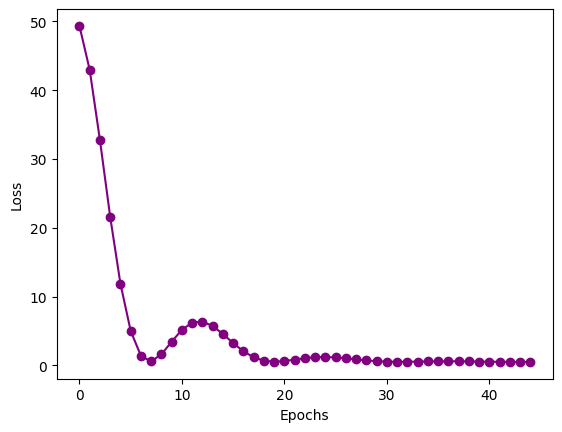

In [ ]:
Epochs=np.arange(0,len(loss))
plott(Epochs,loss,0)

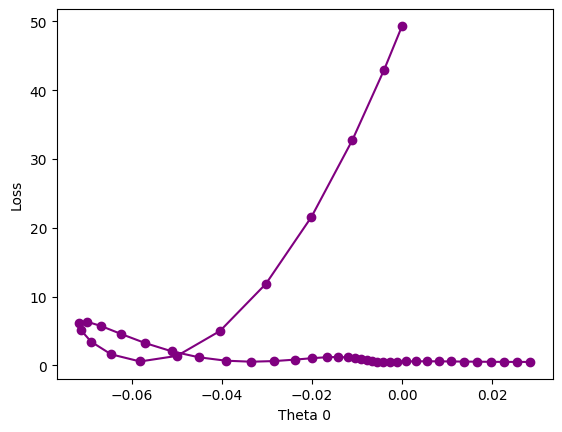

In [ ]:
plott(theta0l,loss,1)


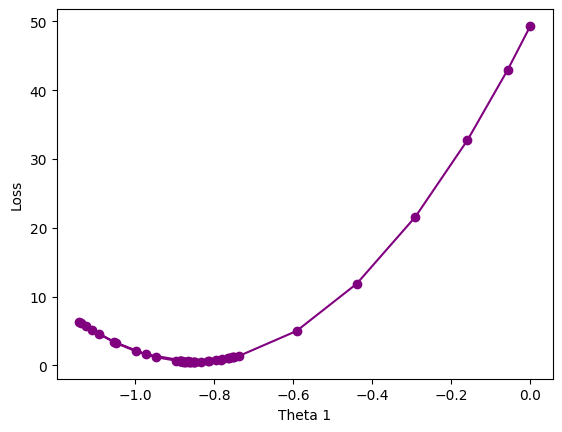

In [ ]:
plott(theta1l,loss,2)

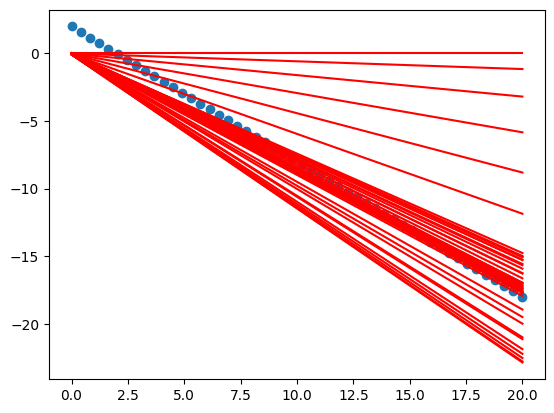

In [ ]:
plt.scatter(x,y)
for i in range(0,len(y_predictl)):
    plt.plot(x,y_predictl[i],color="r")

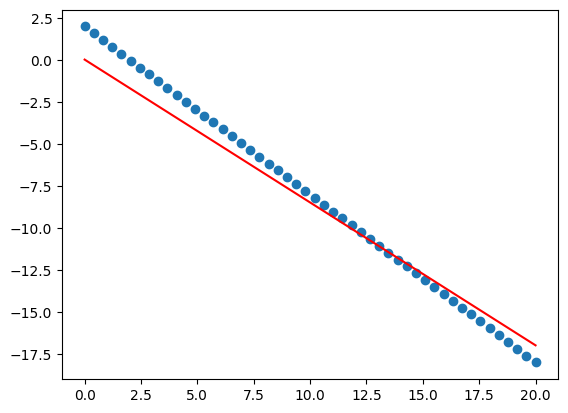

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_predictl[-1],color="r")

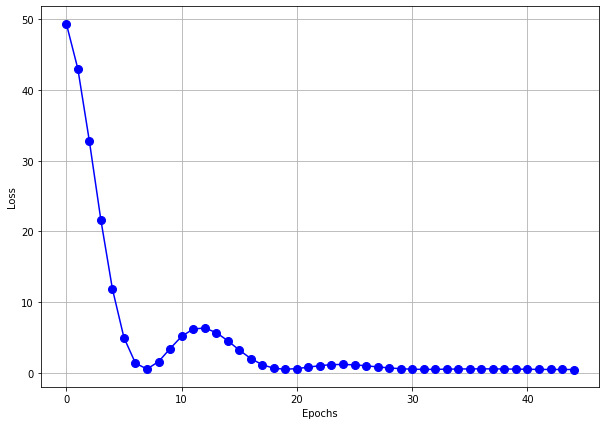

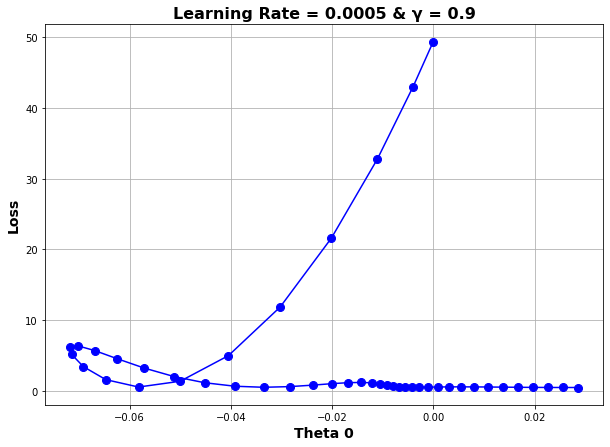

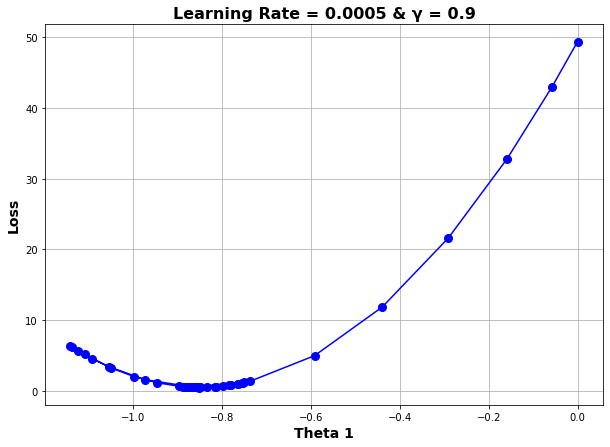

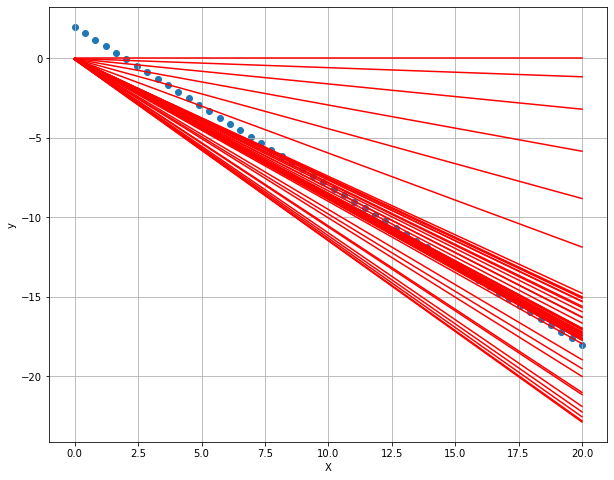

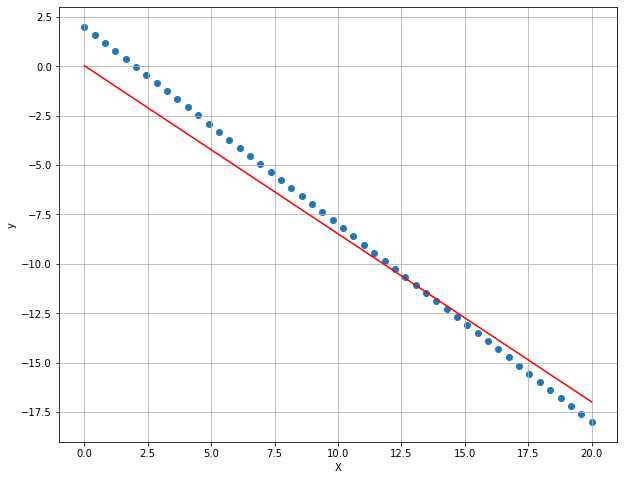

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [ ]:
theta0l,theta1l,loss,y_predictl,theta0,theta1=nag(x,y,0.0005,0.89,300)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector: 
 [[  8.        ]
 [114.69387755]]
gradientvecnorm 114.97254258164628

theta_0_new 0

theta_1_new 0
****************** It

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [ ]:
print("r2_score:",r2_score(y,y_predictl[len(y_predictl)-1]))

r2_score: 0.9699718983158406


r2 score =  0.9699718983158406


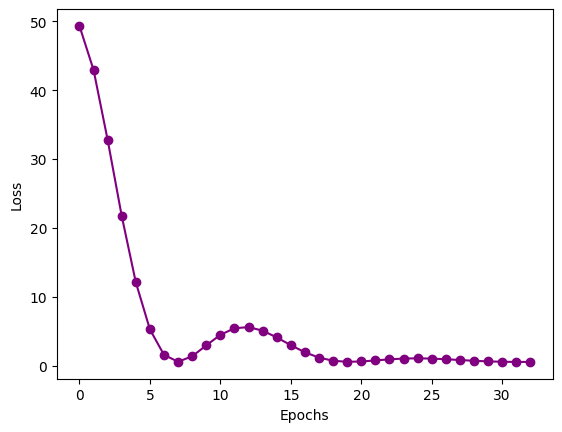

In [ ]:
Epochs=np.arange(0,len(loss))
plott(Epochs,loss,0)

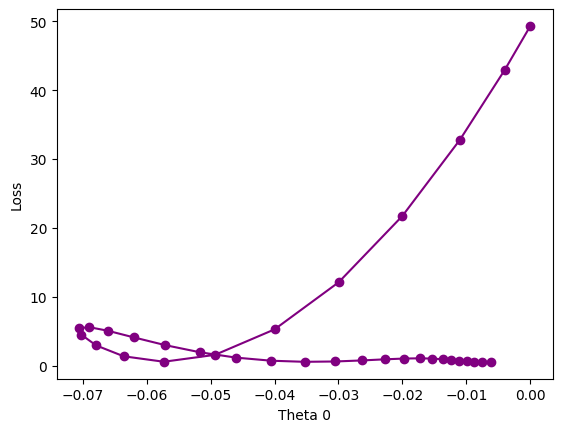

In [ ]:
plott(theta0l,loss,1)


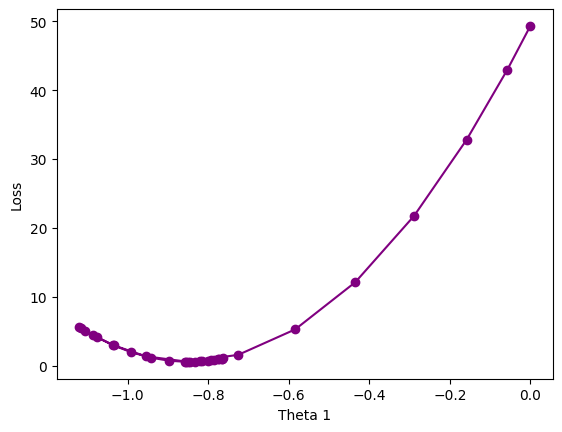

In [ ]:
plott(theta1l,loss,2)


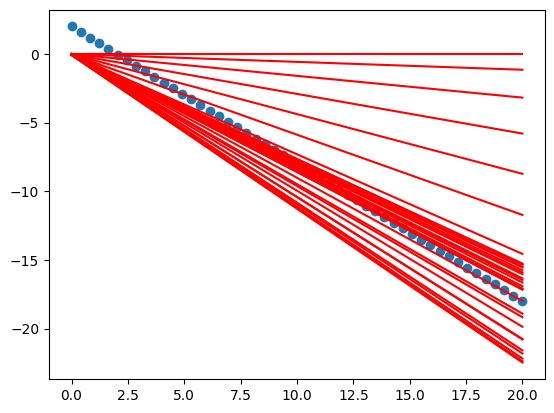

In [ ]:
plt.scatter(x,y)
for i in range(0,len(y_predictl)):
    plt.plot(x,y_predictl[i],color="r")

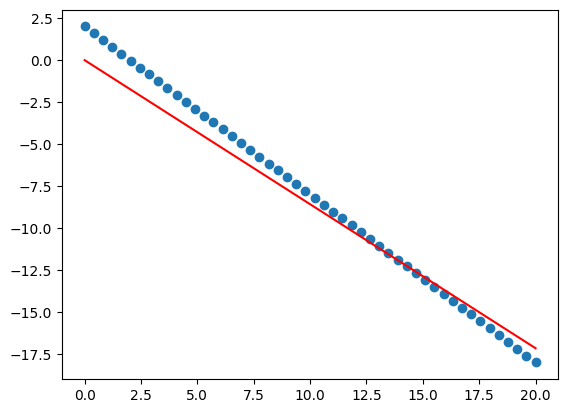

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_predictl[-1],color="r")

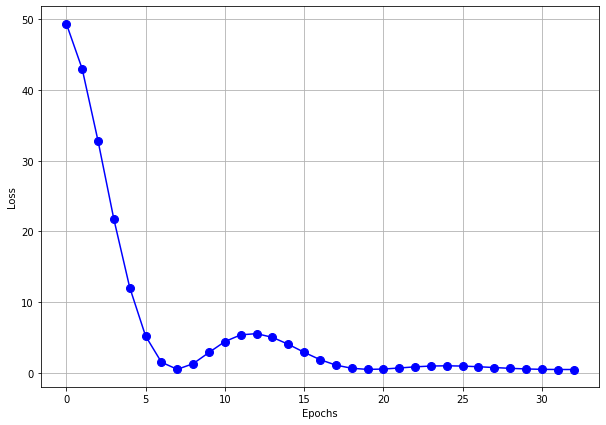

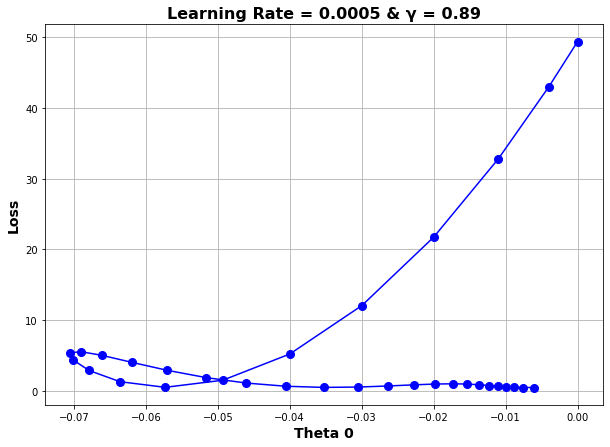

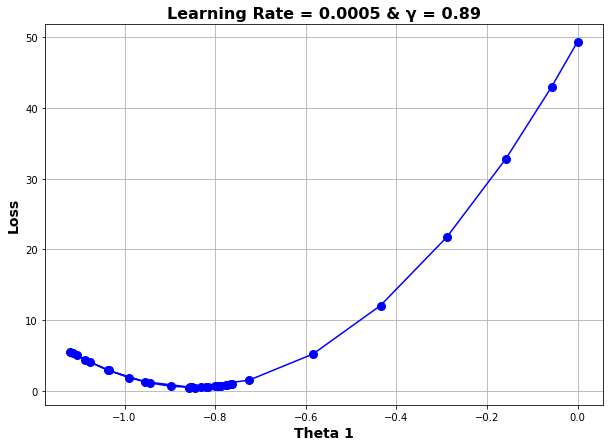

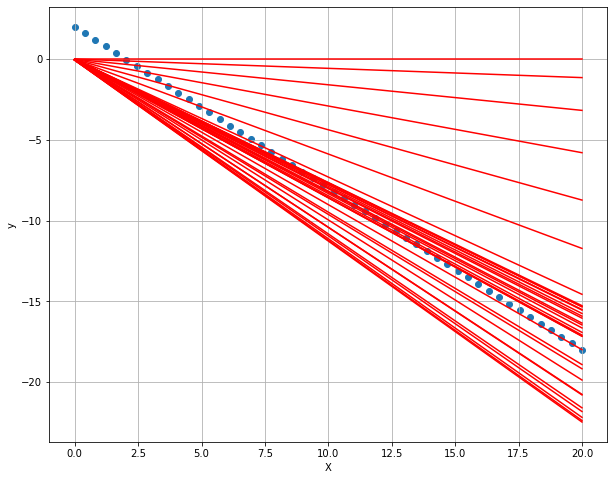

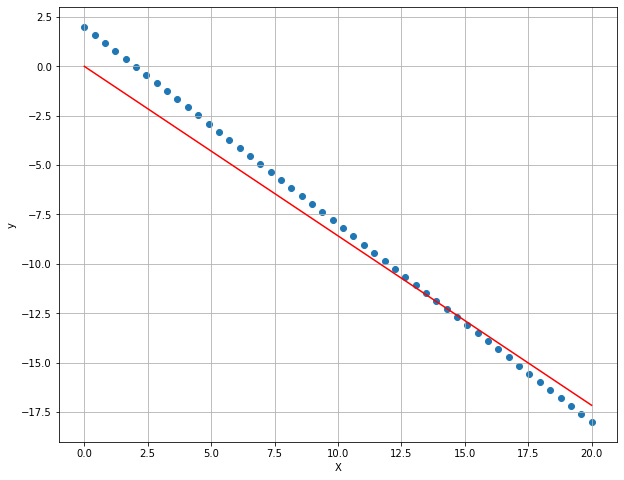